In [1]:
import itertools
import numpy as np
import audiolabel.util
import matplotlib

%matplotlib inline

In [2]:
data = audiolabel.util.read_data('pp_data/train.h5')
data.head()

,samples,nonpadded_length,labels_ohe
0,"[[0.886560577557, 0.444834400121, 0.5135257155...",199.0,"[0, 0, 1, 0, 1, 0, 0]"
1,"[[0.858467235214, 0.58577094939, 0.57740595890...",199.0,"[0, 0, 0, 0, 1, 0, 0]"
2,"[[0.0, 0.591527072745, 0.616995645262, 0.56399...",199.0,"[1, 0, 1, 1, 0, 0, 0]"
3,"[[0.887629171882, 0.460921320313, 0.5923310722...",199.0,"[0, 0, 1, 0, 0, 0, 0]"
4,"[[0.803741140678, 0.43294598433, 0.49309186990...",199.0,"[0, 0, 0, 0, 1, 0, 0]"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efedff00310>]], dtype=object)

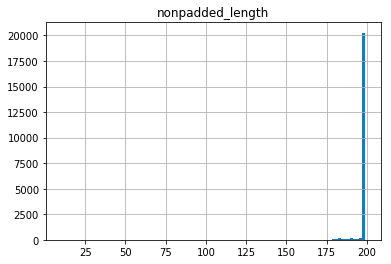

In [3]:
data.hist(column='nonpadded_length', bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efedfd71d10>]], dtype=object)

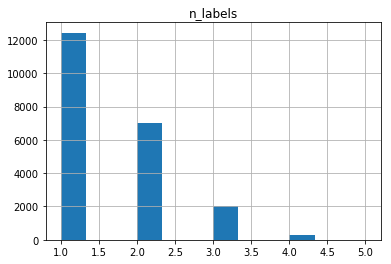

In [4]:
data['n_labels'] = data['labels_ohe'].apply(np.sum)
data.hist(column='n_labels', bins=12)

In [5]:
data['labels'] = data['labels_ohe'].apply(np.nonzero).apply(lambda labels: labels[0])
data.head()

,samples,nonpadded_length,labels_ohe,n_labels,labels
0,"[[0.886560577557, 0.444834400121, 0.5135257155...",199.0,"[0, 0, 1, 0, 1, 0, 0]",2,"[2, 4]"
1,"[[0.858467235214, 0.58577094939, 0.57740595890...",199.0,"[0, 0, 0, 0, 1, 0, 0]",1,[4]
2,"[[0.0, 0.591527072745, 0.616995645262, 0.56399...",199.0,"[1, 0, 1, 1, 0, 0, 0]",3,"[0, 2, 3]"
3,"[[0.887629171882, 0.460921320313, 0.5923310722...",199.0,"[0, 0, 1, 0, 0, 0, 0]",1,[2]
4,"[[0.803741140678, 0.43294598433, 0.49309186990...",199.0,"[0, 0, 0, 0, 1, 0, 0]",1,[4]


(array([ 8675.,     0.,     0.,     0.,  1015.,     0.,     0.,     0.,
         7862.,     0.,     0.,     0.,  2438.,     0.,     0.,     0.,
         8282.,     0.,     0.,     0.,  3255.,     0.,     0.,     0.,
         2304.]),
 array([ 0.  ,  0.24,  0.48,  0.72,  0.96,  1.2 ,  1.44,  1.68,  1.92,
         2.16,  2.4 ,  2.64,  2.88,  3.12,  3.36,  3.6 ,  3.84,  4.08,
         4.32,  4.56,  4.8 ,  5.04,  5.28,  5.52,  5.76,  6.  ]),
 <a list of 25 Patch objects>)

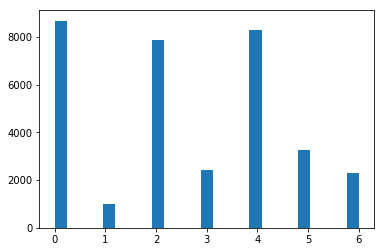

In [6]:
matplotlib.pyplot.hist(list(itertools.chain.from_iterable(data['labels'].ravel().flat)), bins='auto')

In [7]:
#data[data['labels_ohe'].isin([[1, 0, 0, 0, 0, 0, 0],])]['labels'].apply(lambda x: x[0]).hist()
x = np.array([ 8675.,  1015.,  7862.,  2438.,  8282.,  3255.,  2304.])
x / x.sum()

array([ 0.25642163,  0.03000207,  0.23239041,  0.07206408,  0.24480506,
        0.09621353,  0.06810322])